In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split

# https://www.kaggle.com/elikplim/car-evaluation-data-set

df = pd.read_csv('car_evaluation.csv')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [2]:
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'y_class']
df.describe()

,buying,maint,doors,persons,lug_boot,safety,y_class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,5more,4,med,high,unacc
freq,432,432,432,576,576,576,1209


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   y_class   1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [4]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
y_class     0
dtype: int64

In [5]:
for feature in df.columns:
    print(f'{feature.upper()} categories {df[feature].unique()}')

BUYING categories ['vhigh' 'high' 'med' 'low']
MAINT categories ['vhigh' 'high' 'med' 'low']
DOORS categories ['2' '3' '4' '5more']
PERSONS categories ['2' '4' 'more']
LUG_BOOT categories ['small' 'med' 'big']
SAFETY categories ['med' 'high' 'low']
Y_CLASS categories ['unacc' 'acc' 'vgood' 'good']


<AxesSubplot:ylabel='y_class'>

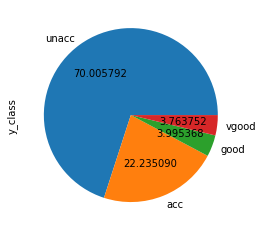

In [15]:
df['y_class'].value_counts().plot(kind='pie', autopct='%f')

In [8]:
X = df.drop('y_class', axis=1)
y = df.y_class
print(f'X.shape: {X.shape:}')
print(f'y.shape: {y.shape:}')
X.head()

X.shape: (1727, 6)
y.shape: (1727,)


,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high


In [9]:
X = pd.get_dummies(X)
print(X.shape)
X.head()

(1727, 21)


,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,1,0,0


In [10]:
y = pd.get_dummies(y)
print(y.shape)
y.head()

(1727, 4)


,acc,good,unacc,vgood
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, shuffle=True)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1381, 21)
(1381, 4)
(346, 21)
(346, 4)


In [12]:
from tensorflow.keras.callbacks import Callback
class myCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.999):
            print('n\Reached desired accuracy of 99.9%. Training stopped!')
            self.model.stop_training = True

In [13]:
# model 
def tensorflow_model():
    
    callbacks = myCallbacks()
        
    model = tf.keras.models.Sequential([

            tf.keras.layers.Dense(254, activation='relu'),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(6, activation='relu'),
            tf.keras.layers.Dense(4, activation='softmax')
        ])
    
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=50, callbacks=[callbacks])
    
    model.summary() 
    
    evaluation = model.evaluate(X_test, y_test, verbose=1)
    
    return history.history['accuracy'][-1], evaluation

history, evaluation = tensorflow_model()

Epoch 1/50
44/44 [==============================] - 1s 1ms/step - loss: 1.0049 - accuracy: 0.6646
Epoch 2/50
44/44 [==============================] - 0s 2ms/step - loss: 0.3994 - accuracy: 0.8240
Epoch 3/50
44/44 [==============================] - 0s 1ms/step - loss: 0.2519 - accuracy: 0.8943
Epoch 4/50
44/44 [==============================] - 0s 2ms/step - loss: 0.1721 - accuracy: 0.9288
Epoch 5/50
44/44 [==============================] - 0s 2ms/step - loss: 0.1274 - accuracy: 0.9394
Epoch 6/50
44/44 [==============================] - 0s 1ms/step - loss: 0.0942 - accuracy: 0.9495
Epoch 7/50
44/44 [==============================] - 0s 1ms/step - loss: 0.0773 - accuracy: 0.9537
Epoch 8/50
44/44 [==============================] - 0s 2ms/step - loss: 0.0643 - accuracy: 0.9668
Epoch 9/50
44/44 [==============================] - 0s 2ms/step - loss: 0.0640 - accuracy: 0.9653
Epoch 10/50
44/44 [==============================] - 0s 2ms/step - loss: 0.0509 - accuracy: 0.9851
Epoch 11/50
44/44 [

In [14]:
print(f'Training accuracy: {round(history, 3)}')
print(f'Test loss: {round(evaluation[0], 3)}')
print(f'Test accuracy: {round(evaluation[1], 3)}')

Training accuracy: 1.0
Test loss: 0.032
Test accuracy: 0.991
